# Data Quality Check for a Crime Data Dataset

In this notebook, the focus is on conducting a Data Quality Check and analyzing Crime Data from 2020 to the present. The aim is to ensure the data is clean, structured, and ready for analysis. This step is crucial for accurate interpretation and meaningful insights. The following steps outline the process we'll follow to achieve this goal.

Data quality management is a critical aspect of data engineering, ensuring that data is accurate, complete, and trustworthy for informed decision-making. This process involves a series of checks and methodologies designed to maintain data accuracy, completeness, reliability, and timeliness throughout the ETL (Extract, Transform, Load) pipeline

Key data quality checks include:
- **Profiling data** to understand its distribution, summary statistics, and patterns, which helps in identifying anomalies or unusual patterns that may require attention
- **Ensuring data adheres to the expected schema**, including column names, data types, and constraints, and implementing schema evolution checks to handle changes gracefully
- **Applying business-specific validation rules** to ensure that data aligns with business requirements, such as validating that all transactions have positive values in financial data
- **Implementing data cleansing routines** to address issues such as inconsistent capitalization, formatting, or typos, and standardizing data to maintain consistency
- **Maintaining data lineage documentation** to track the source and transformations of data throughout the pipeline, enabling traceability to identify issues and their sources quickly

Best practices for effective data quality checks include:
- **Documentation** to ensure that data quality checks are well-defined and understood by all involved, making the documentation accessible to the data engineering team, data analysts, and business users
- **Sampling** to validate a representative subset of data efficiently when dealing with large datasets, ensuring the sampling process is random and statistically sound
- **Regular regression testing** to ensure that changes do not introduce data quality issues, with a process that reruns data quality checks on historical data to identify discrepancies
- **Automation** of data quality checks to perform them consistently and at scale, reducing the risk of human error, and using scheduling tools or workflow orchestration platforms to automate these checks as part of the data pipeline
- **Logging and alerting mechanisms** to provide real-time visibility into the health of data and allow immediate action when issues arise

Data quality checks are essential for ensuring reliable, accurate, and consistent data, helping to identify and rectify errors, anomalies, or missing information, thereby preventing downstream issues in decision-making processes. By incorporating these critical checks and best practices into data engineering practices, organizations can enhance the credibility of their data and enable confident, informed decision-making.

### First, let's read the dataset file in Python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
crime_data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [ ]:
crime_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845671,230513800,09/22/2023 12:00:00 AM,09/22/2023 12:00:00 AM,400,5,Harbor,551,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,1300 W SEPULVEDA ST,NaN,33.7452,-118.3043
845672,230119675,08/03/2023 12:00:00 AM,06/14/2023 12:00:00 AM,900,1,Central,135,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,300 S MAIN ST,NaN,34.0495,-118.2459
845673,232113285,08/24/2023 12:00:00 AM,08/23/2023 12:00:00 AM,2345,21,Topanga,2138,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,AA,Adult Arrest,236.0,NaN,NaN,NaN,20300 SHERMAN WY,NaN,34.2011,-118.5772
845674,230610959,06/10/2023 12:00:00 AM,06/07/2023 12:00:00 AM,1730,6,Hollywood,645,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,FOUNTAIN AV,N LA BREA AV,34.0944,-118.3441


Let's see the types of data that are within this dataset:

In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845676 entries, 0 to 845675
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           845676 non-null  int64  
 1   Date Rptd       845676 non-null  object 
 2   DATE OCC        845676 non-null  object 
 3   TIME OCC        845676 non-null  int64  
 4   AREA            845676 non-null  int64  
 5   AREA NAME       845676 non-null  object 
 6   Rpt Dist No     845676 non-null  int64  
 7   Part 1-2        845676 non-null  int64  
 8   Crm Cd          845676 non-null  int64  
 9   Crm Cd Desc     845676 non-null  object 
 10  Mocodes         728050 non-null  object 
 11  Vict Age        845676 non-null  int64  
 12  Vict Sex        733846 non-null  object 
 13  Vict Descent    733839 non-null  object 
 14  Premis Cd       845666 non-null  float64
 15  Premis Desc     845169 non-null  object 
 16  Weapon Used Cd  293120 non-null  float64
 17  Weapon Des

### frequency distribution analysis

Why is this important?
Performing frequency distribution analysis and other data analysis is important for several reasons:
1. Identify Patterns and Trends:
Helps identify patterns and trends in data. For example, by looking at the frequency distribution of different types of crimes, you can identify which crimes are most common in a certain area or time period.
2. Make Informed Decisions:
Provides a solid foundation for making informed decisions. By understanding the distribution of data, authorities can allocate resources more effectively. For example, if an increase in a particular type of crime is observed, specific preventative measures can be taken.
3. Detect Anomalies:
It allows detecting anomalies or outliers in the data. These values may indicate errors in the data or unusual situations that require additional investigation.
4. Improve Efficiency and Effectiveness:
By understanding the distribution of data, processes and resources can be optimized. For example, if it is observed that most crimes occur in certain areas and at certain times of day, police patrols can be implemented more strategically.
5. Comply with Objectives and Mandates:
In many cases, government or security agencies are responsible for reporting on certain metrics and meeting specific objectives. Data analysis helps them meet these mandates and demonstrate the effectiveness of their actions.

**We proceed to do a frequency distribution analysis for our variables, later based on this analysis we will define which variables we should select and which ones to discard.**

In [ ]:
crime_frequency = crime_data['DR_NO'].value_counts()
print('Frequency distribution of DR_NO')
print(crime_frequency)

Frequency distribution of DR_NO
190326475    1
220313285    1
221713955    1
231918093    1
220126691    1
            ..
210121696    1
211401126    1
210316564    1
220807599    1
231204228    1
Name: DR_NO, Length: 845676, dtype: int64


Obviously, as we observe, the 'DR_NO' is a unique number as it is an Official file number

In [ ]:
crime_frequency = crime_data['DATE OCC'].value_counts()
print('Frequency distribution of Date of crime occurrence:')
print(crime_frequency)

Frequency distribution of Date of crime occurrence:
12/02/2022 12:00:00 AM    1132
01/01/2020 12:00:00 AM    1130
10/01/2022 12:00:00 AM    1071
12/01/2022 12:00:00 AM    1052
06/01/2022 12:00:00 AM    1040
                          ... 
12/28/2023 12:00:00 AM     398
11/06/2023 12:00:00 AM     397
08/20/2023 12:00:00 AM     377
02/18/2024 12:00:00 AM     345
02/19/2024 12:00:00 AM      99
Name: DATE OCC, Length: 1511, dtype: int64


In [ ]:
crime_frequency = crime_data['AREA'].value_counts()
print('Frequency distribution of Area of crime occurrence:')
print(crime_frequency)

Frequency distribution of Area of crime occurrence:
1     57340
12    53087
14    49286
3     47556
6     44775
18    42754
20    42633
15    42425
13    42112
7     40393
2     39844
8     38741
11    36527
9     35640
10    35375
5     34835
21    34499
17    34430
19    33682
4     31651
16    28091
Name: AREA, dtype: int64


In [ ]:
crime_frequency = crime_data['AREA NAME'].value_counts()
print('Frequency distribution of Area of crime occurrence:')
print(crime_frequency)

Frequency distribution of Area of crime occurrence:
Central        57340
77th Street    53087
Pacific        49286
Southwest      47556
Hollywood      44775
Southeast      42754
Olympic        42633
N Hollywood    42425
Newton         42112
Wilshire       40393
Rampart        39844
West LA        38741
Northeast      36527
Van Nuys       35640
West Valley    35375
Harbor         34835
Topanga        34499
Devonshire     34430
Mission        33682
Hollenbeck     31651
Foothill       28091
Name: AREA NAME, dtype: int64


In [ ]:
crime_frequency = crime_data['Rpt Dist No'].value_counts()
print('Frequency distribution of sub-area of crime occurrence:')
print(crime_frequency)

Frequency distribution of sub-area of crime occurrence:
162     4495
645     4229
182     4009
1494    3893
646     3758
        ... 
226        1
1048       1
704        1
1784       1
1013       1
Name: Rpt Dist No, Length: 1205, dtype: int64


In [ ]:
crime_frequency = crime_data['Crm Cd'].value_counts()
print('Frequency distribution of crime committed:')
print(crime_frequency)

Frequency distribution of crime committed:
510    90857
624    67091
354    52663
330    52306
310    51754
       ...  
475        5
906        4
884        3
445        2
926        1
Name: Crm Cd, Length: 139, dtype: int64


In [ ]:
crime_frequency = crime_data['Crm Cd Desc'].value_counts()
print('Frequency distribution of crime committed:')
print(crime_frequency)

Frequency distribution of crime committed:
VEHICLE - STOLEN                            90857
BATTERY - SIMPLE ASSAULT                    67091
THEFT OF IDENTITY                           52663
BURGLARY FROM VEHICLE                       52306
BURGLARY                                    51754
                                            ...  
THEFT, COIN MACHINE - ATTEMPT                   5
FIREARMS RESTRAINING ORDER (FIREARMS RO)        4
FAILURE TO DISPERSE                             3
DISHONEST EMPLOYEE ATTEMPTED THEFT              2
TRAIN WRECKING                                  1
Name: Crm Cd Desc, Length: 139, dtype: int64


In [ ]:
crime_frequency = crime_data['Vict Age'].value_counts()
print('Frequency distribution of victim age:')
print(crime_frequency)

Frequency distribution of victim age:
 0      211360
 30      19231
 35      18800
 31      18336
 29      18306
         ...  
 97         62
-2          16
-4           3
-3           2
 120         1
Name: Vict Age, Length: 104, dtype: int64


In [ ]:
crime_frequency = crime_data['Vict Sex'].value_counts()
print('Frequency distribution of victim sex:')
print(crime_frequency)

Frequency distribution of victim sex:
M    348156
F    309701
X     75890
H        98
-         1
Name: Vict Sex, dtype: int64


In [ ]:
crime_frequency = crime_data['Vict Descent'].value_counts()
print('Frequency distribution of victim descent:')
print(crime_frequency)

Frequency distribution of victim descent:
H    258184
W    171749
B    119396
X     83707
O     66883
A     18548
K      4587
F      3586
C      3302
J      1171
V       888
I       792
Z       425
P       226
U       167
D        67
G        58
L        54
S        47
-         2
Name: Vict Descent, dtype: int64


In [ ]:
crime_frequency = crime_data['Premis Cd'].value_counts()
print('Frequency distribution of location where the crime took place:')
print(crime_frequency)

Frequency distribution of location where the crime took place:
101.0    214227
501.0    142796
502.0    103220
108.0     58817
203.0     39995
          ...  
889.0         2
891.0         2
715.0         2
976.0         2
137.0         1
Name: Premis Cd, Length: 314, dtype: int64


In [ ]:
crime_frequency = crime_data['Premis Desc'].value_counts()
print('Frequency distribution of location where the crime took place:')
print(crime_frequency)

Frequency distribution of location where the crime took place:
STREET                                          214227
SINGLE FAMILY DWELLING                          142796
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    103220
PARKING LOT                                      58817
OTHER BUSINESS                                   39995
                                                 ...  
DEPT OF DEFENSE FACILITY                             2
SEWAGE FACILITY/PIPE                                 2
HORSE RACING/SANTA ANITA PARK*                       2
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
Name: Premis Desc, Length: 306, dtype: int64


In [ ]:
crime_frequency = crime_data['Weapon Used Cd'].value_counts()
print('Frequency distribution of weapon use:')
print(crime_frequency)

Frequency distribution of weapon use:
400.0    157122
500.0     31391
511.0     21418
102.0     18149
109.0      6588
          ...  
120.0         3
121.0         2
123.0         1
119.0         1
124.0         1
Name: Weapon Used Cd, Length: 79, dtype: int64


In [ ]:
crime_frequency = crime_data['Weapon Desc'].value_counts()
print('Frequency distribution of weapon use:')
print(crime_frequency)

Frequency distribution of weapon use:
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    157122
UNKNOWN WEAPON/OTHER WEAPON                        31391
VERBAL THREAT                                      21418
HAND GUN                                           18149
SEMI-AUTOMATIC PISTOL                               6588
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: Weapon Desc, Length: 79, dtype: int64


In [ ]:
crime_frequency = crime_data['LOCATION'].value_counts()
print('Frequency distribution of location:')
print(crime_frequency)

Frequency distribution of location:
800 N  ALAMEDA                      ST      1616
6TH                          ST             1412
7TH                          ST             1360
7TH                                         1327
10200    SANTA MONICA                 BL    1287
                                            ... 
10000    HOME DEPOT PLAZA             RD       1
4500    AUCKLAND                     AV        1
10500    GLENOAKS                     BL       1
1700    SYCAMORE                     AV        1
5800    ARLIN                                  1
Name: LOCATION, Length: 64233, dtype: int64


In [ ]:
crime_frequency = crime_data['LAT'].value_counts()
print('Frequency distribution of latitude coordinate:')
print(crime_frequency)

Frequency distribution of latitude coordinate:
34.1016    4768
34.2012    3820
34.0980    3703
34.1939    2990
34.1867    2674
           ... 
33.8095       1
34.1508       1
33.8373       1
33.7984       1
34.3246       1
Name: LAT, Length: 5405, dtype: int64


In [ ]:
crime_frequency = crime_data['LON'].value_counts()
print('Frequency distribution of longitude coordinate:')
print(crime_frequency)

Frequency distribution of longitude coordinate:
-118.2739    6420
-118.2827    5572
-118.2652    3623
-118.2915    3590
-118.2871    3373
             ... 
-118.6586       1
-118.6271       1
-118.5875       1
-118.5887       1
-118.1659       1
Name: LON, Length: 4972, dtype: int64


### Statistical summary
now let's do a statistical summary using the '.describe()' function

In [ ]:
crime_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.456760e+05,845676.000000,845676.000000,845676.000000,845676.000000,845676.000000,845676.000000,845666.000000,293120.000000,845666.000000,62020.000000,2088.000000,61.000000,845675.000000,845675.000000
mean,2.169337e+08,1336.315330,10.702001,1116.621401,1.412096,500.917529,29.678351,306.123302,363.151116,500.664371,957.560271,983.849138,990.868852,33.982577,-118.037525
std,1.158390e+07,653.384835,6.099897,609.999536,0.492213,207.767612,21.817928,217.203329,123.712809,207.561175,111.178694,52.625379,27.690236,1.763367,6.113777
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.102152e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.014300,-118.429600
50%,2.202117e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321500
75%,2.221167e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163300,-118.273900
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


We will draw some conclusions regarding the ages of the victims:
* There are a total of 910.707 victim age records.
* The average age of the victims is approximately 29.5 years old.
* The standard deviation of the ages is approximately 21.8 years, indicating considerable dispersion around the mean.
* Ages range from -4 years (possibly an error or outlier) to 120 years.
* Percentiles show how ages are distributed in quartiles: 25% of ages are less than or equal to 0 years, 50% are equal to 31 years and 75% are equal to 45 years.

Other conclusions that we obtained were:
* Areas
AREA (LAPD Community Policing Stations): Data shows that there are 21 community policing stations in Los Angeles, numbered 1 through 21. The distribution of crimes between these areas can vary significantly, suggesting that different areas may have different levels of crime.
weapons
* Weapon Used Cd: The weapon used code varies significantly, ranging from 0.000000 to 999.000000. This indicates that a wide range of weapons may be involved in crimes, from unspecified weapons to specific weapons such as firearms.
* Crime Code
Crm Cd (Crime Code): Crime codes range from 1.000000 to 999.000000, suggesting that there is a wide range of crimes committed. This includes property crimes, violent crimes, drug crimes, and other types of crimes.

### Extracting missing values
Now we will extract the missing values from the data frame

In [ ]:
missing_values = crime_data.isnull()
print(missing_values)

        DR_NO  Date Rptd  DATE OCC  TIME OCC   AREA  AREA NAME  Rpt Dist No  \
0       False      False     False     False  False      False        False   
1       False      False     False     False  False      False        False   
2       False      False     False     False  False      False        False   
3       False      False     False     False  False      False        False   
4       False      False     False     False  False      False        False   
...       ...        ...       ...       ...    ...        ...          ...   
845671  False      False     False     False  False      False        False   
845672  False      False     False     False  False      False        False   
845673  False      False     False     False  False      False        False   
845674  False      False     False     False  False      False        False   
845675  False      False     False     False  False      False        False   

        Part 1-2  Crm Cd  Crm Cd Desc  ...  Status 

In [ ]:
missing_count = crime_data.isnull().sum()
print(missing_count)

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           117626
Vict Age               0
Vict Sex          111830
Vict Descent      111837
Premis Cd             10
Premis Desc          507
Weapon Used Cd    552556
Weapon Desc       552556
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          783656
Crm Cd 3          843588
Crm Cd 4          845615
LOCATION               0
Cross Street      711547
LAT                    1
LON                    1
dtype: int64


In [ ]:
missing_columns = missing_count[missing_count > 0]
print(missing_columns)

Mocodes           117626
Vict Sex          111830
Vict Descent      111837
Premis Cd             10
Premis Desc          507
Weapon Used Cd    552556
Weapon Desc       552556
Crm Cd 1              10
Crm Cd 2          783656
Crm Cd 3          843588
Crm Cd 4          845615
Cross Street      711547
LAT                    1
LON                    1
dtype: int64


some conclutions from the missing data:

* Vict Sex and Vict Descent: There are 121,035 missing values in Vict Sex and 121,044 missing values in Vict Descent pertain to the demographic information of the victim, including sex and descent. Missing values in these columns might suggest that this information wasn't recorded or available at the time of identifying the crime or making the report.

* Premis Cd and Premis Desc: There are 10 missing values in Premis Cd and 554 missing values in Premis Desc. These columns might relate to the code and description of the premises where the crime occurred. The missing values could indicate either incomplete recording or lack of information about the premises. It is possible that some of these missing values can be filled based on the respective code or description, since both variables essentially have the same data in this case the space where the crime occurred only changes in how it is identified.

* Weapon Used Cd and Weapon Desc: There are 595,460 missing values in both Weapon Used Cd and Weapon Desc columns. The high number of missing values suggests that either weapons were not involved in many incidents, or this information wasn't recorded consistently.

* Cross Street: There are 767,375 missing values in the Cross Street column. This column refers to the name of the cross street where the incident occurred. The missing values indicate that either the incidents didn't occur at intersections or the cross street information wasn't consistently recorded.

* Crm Cd 1 has only a few missing values, suggesting that this variable might be more consistently recorded compared to others.Showing that the vast majority of reported crimes have a classification.

### Showing distribution of numerical and categorical variables by plots

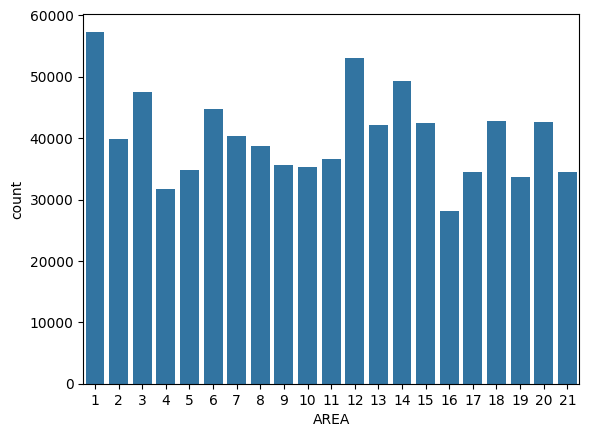

In [ ]:
sns.countplot(x='AREA', data=crime_data)
plt.show()

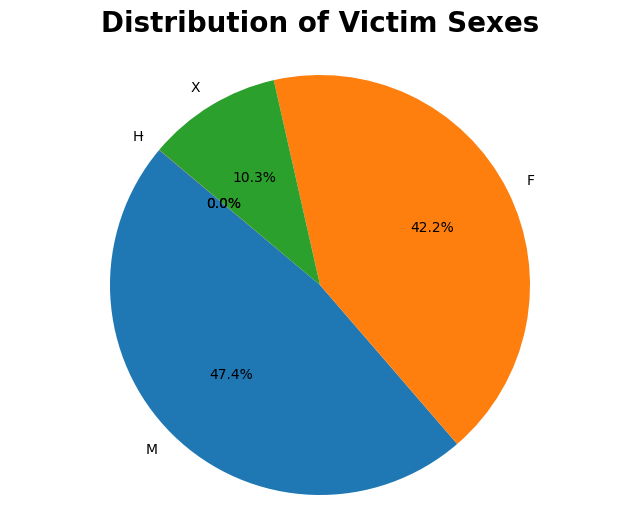

In [ ]:
# Create the count plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
sex_counts = crime_data['Vict Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Victim Sexes', fontsize=20, y=1.03, weight='bold')
plt.show()

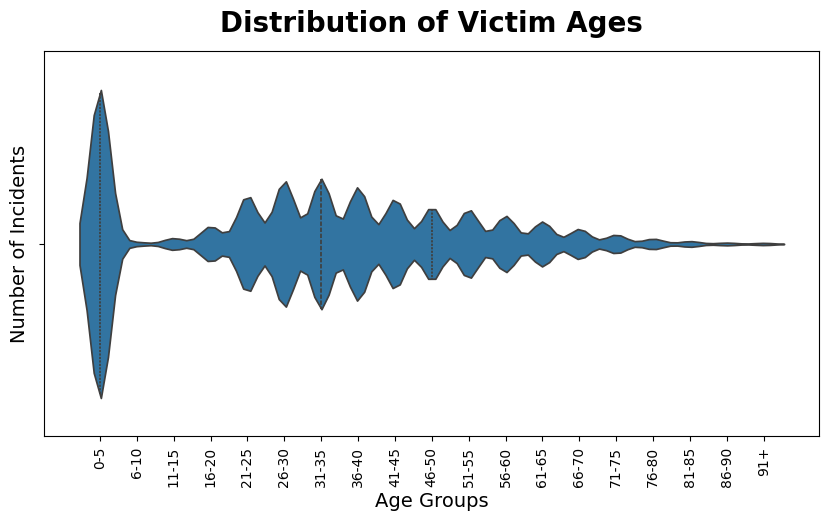

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los grupos de edad
age_groups = [range(age, age + 5) for age in range(0, 90, 5)]
def assign_age_group(age):
    for i, group in enumerate(age_groups):
        if age in group:
            return i
    return len(age_groups)  # For ages outside the defined range

# Apply the function to the DataFrame
crime_data['Age Group'] = crime_data['Vict Age'].apply(assign_age_group)

# Create the violin plot
plt.figure(figsize=(10, 5))  # Adjust the figure size
sns.violinplot(x='Age Group', data=crime_data, inner="quartile")

# Set custom labels for the x-axis
age_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91+']
plt.xticks(range(len(age_labels)), age_labels, rotation='vertical')

plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Distribution of Victim Ages', fontsize=20, y=1.03, weight='bold')
plt.show()

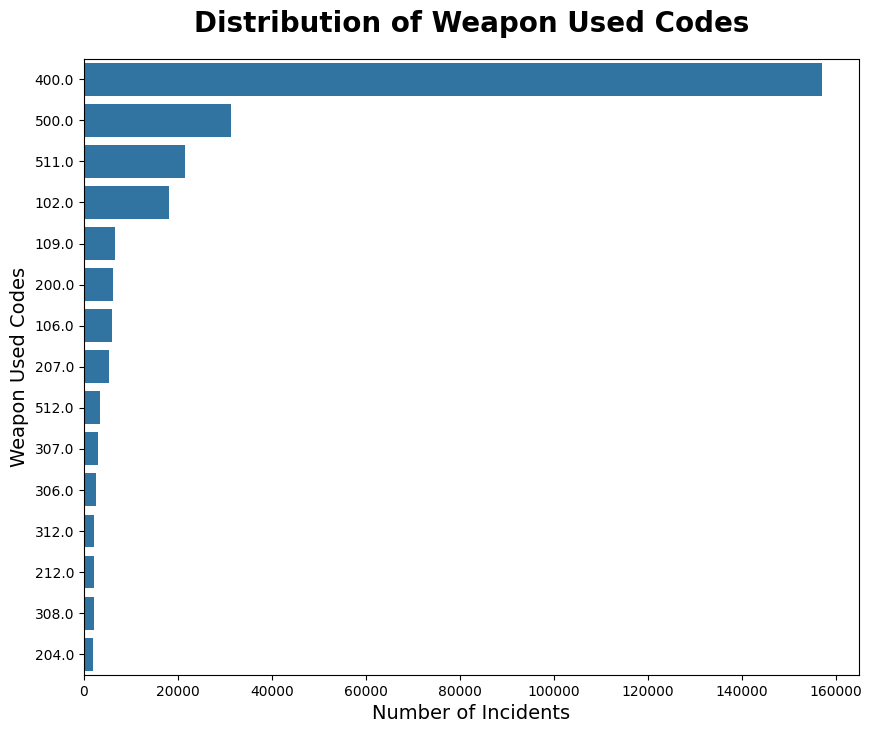

In [ ]:
# Obtain the top weapon codes
top_weapon_codes = crime_data['Weapon Used Cd'].value_counts().nlargest(15).index

# Filter the data based on the top weapon codes
filtered_data = crime_data[crime_data['Weapon Used Cd'].isin(top_weapon_codes)]

# Create the figure for plotting
plt.figure(figsize=(10, 8))

# Plot the count of each weapon code
sns.countplot(y='Weapon Used Cd', data=filtered_data, order=filtered_data['Weapon Used Cd'].value_counts().index)

plt.xlabel('Number of Incidents', fontsize=14)
plt.ylabel('Weapon Used Codes', fontsize=14)
plt.title('Distribution of Weapon Used Codes', fontsize=20, y=1.03, weight='bold')
plt.show()


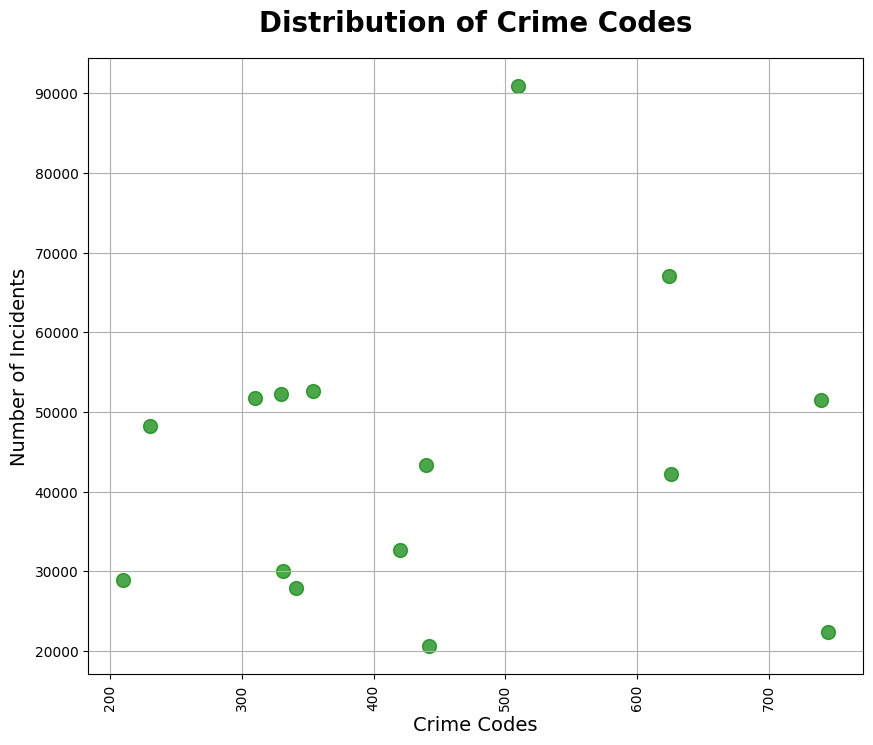

In [ ]:
# Obtain the top crime codes
top_crime_codes = crime_data['Crm Cd'].value_counts().nlargest(15).index

# Filter the data based on the top crime codes
filtered_data = crime_data[crime_data['Crm Cd'].isin(top_crime_codes)]

# Count the occurrences of each crime code
crime_counts = filtered_data['Crm Cd'].value_counts()

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(crime_counts.index, crime_counts.values, s=100, alpha=0.7, color='green')

plt.xlabel('Crime Codes', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Distribution of Crime Codes', fontsize=20, y=1.03, weight='bold')
plt.xticks(rotation='vertical')

plt.grid(True)
plt.show()


<ipython-input-36-72649865225d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


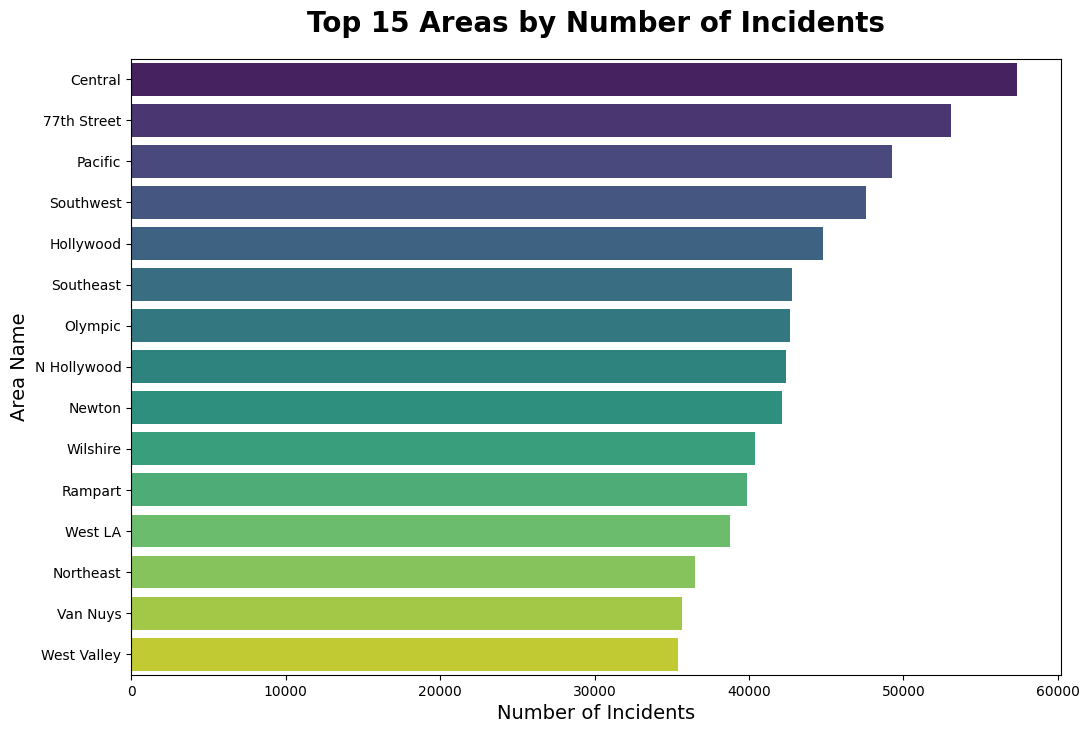

In [ ]:
# Obtain the top areas by count of incidents
top_areas = crime_data['AREA NAME'].value_counts().nlargest(15)

# Create the figure for plotting
plt.figure(figsize=(12, 8))

# Plot the count of incidents for each area
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')

plt.xlabel('Number of Incidents', fontsize=14)
plt.ylabel('Area Name', fontsize=14)
plt.title('Top 15 Areas by Number of Incidents', fontsize=20, y=1.03, weight='bold')
plt.show()

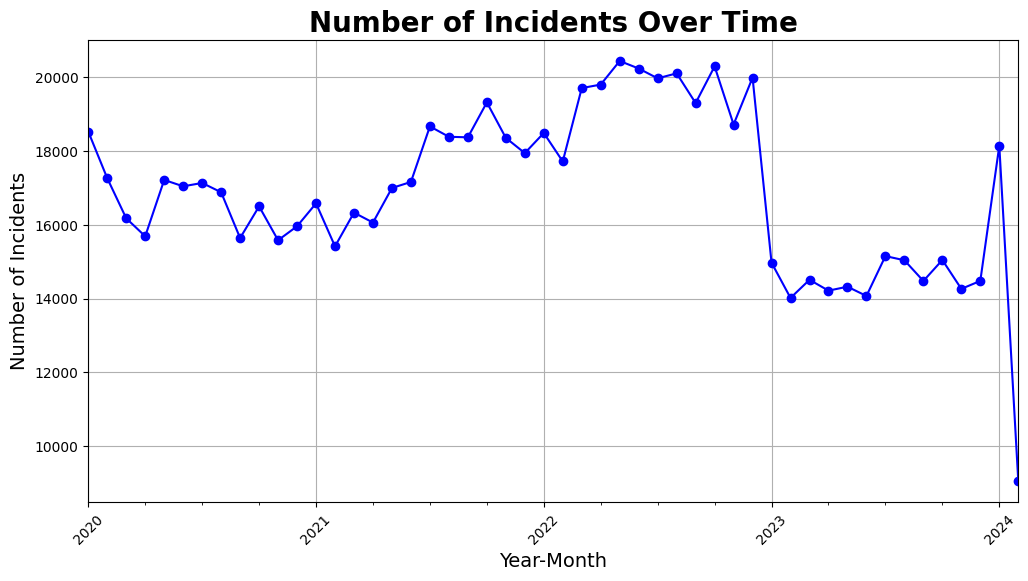

In [ ]:
# Convert 'DATE OCC' column to datetime
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract year-month for grouping
crime_data['Year-Month'] = crime_data['DATE OCC'].dt.to_period('M')

# Group by year-month and count incidents
incidents_by_month = crime_data.groupby('Year-Month').size()

# Plotting the data
plt.figure(figsize=(12, 6))
incidents_by_month.plot(kind='line', marker='o', color='blue')

plt.title('Number of Incidents Over Time', fontsize=20, weight='bold')
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


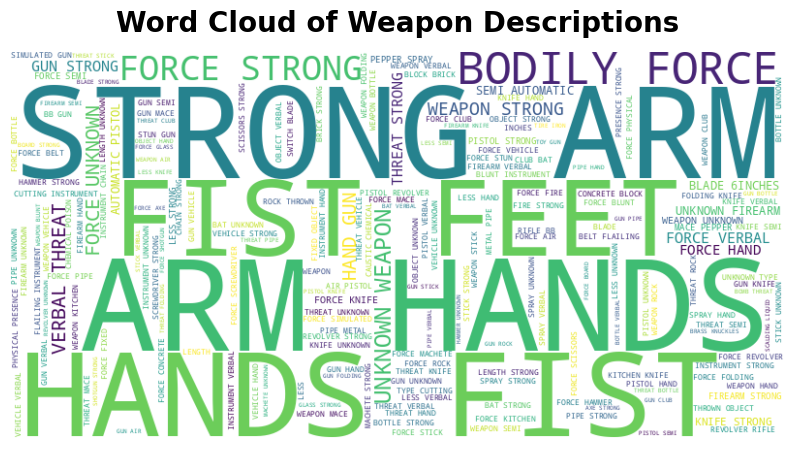

In [ ]:
from wordcloud import WordCloud

# Concatenate weapon descriptions
text = ' '.join(crime_data['Weapon Desc'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weapon Descriptions', fontsize=20, y=1.03, weight='bold')
plt.show()


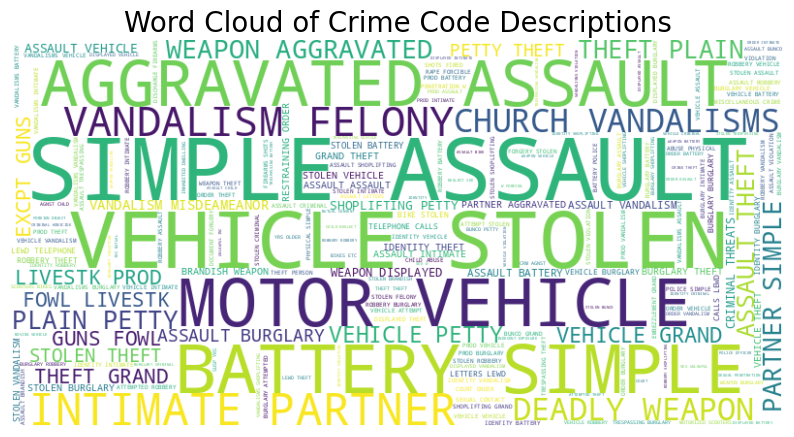

In [ ]:
from wordcloud import WordCloud

# Concatenate all crime descriptions into a single string
text = ' '.join(crime_data['Crm Cd Desc'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Crime Code Descriptions', fontsize=20)
plt.axis('off')
plt.show()

<ipython-input-40-aa2bb6566377>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vict Descent', data=crime_data, palette=colors)
<ipython-input-40-aa2bb6566377>:6: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Vict Descent', data=crime_data, palette=colors)


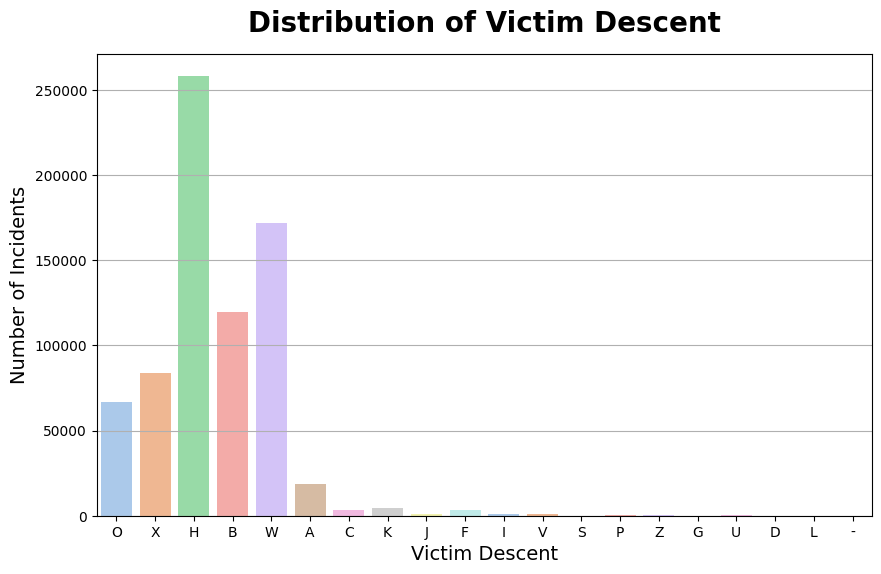

In [ ]:
# Define custom colors
colors = sns.color_palette("pastel")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Vict Descent', data=crime_data, palette=colors)

plt.xlabel('Victim Descent', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Distribution of Victim Descent', fontsize=20, y=1.03, weight='bold')
plt.grid(axis='y')

plt.show()

### Some conclusions:
* We observed that the majority of crimes occurred in area 1, 12 and 14.
* We see that the majority of victims in crimes are men.
* On the other hand, we see that the distribution of the ages of the victims is 0-5 years, however it is necessary to check if these reported crimes coincide with the age of the victim or if they are outliers.
* Weapon code number 400 is the most used in crimes with almost 160,000 reports.
* The most common type of crime is those that correspond to code 500 approximately.
* We see that the central part of Los Angeles is the one with the most crimes present.
* The largest number of crimes reported were in the period from 2022 to 2023.
* Through the word cloud we observe that the largest type of crimes committed involve the use of physical violence more than the use of weapons.
* The most frequent crimes are assault, whether aggravated or simple, simple battery and vehicle theft.
* The descent of the majority of victims is Hispanic/Latin/Mexican.

## Outliers
Extracting outliers in data quality management is a crucial step in ensuring the accuracy and reliability of data. Outliers, which are data points that significantly deviate from the rest of the data, can significantly impact the results of data analysis and decision-making processes. They can arise from various sources, including measurement errors, data entry errors, or genuine anomalies in the data. Identifying and managing outliers is essential for maintaining the integrity of data and preventing misleading conclusions.
### Extracting outliers for each variable
Observing the content of the data, we notice that the only ones with possible outliers are DATE OCC, Vict Age, Vict Sex, since they are the only ones with significant erroneous values, the rest may be because of the codes and description, being a label, it is not so optimal to identify outliers.

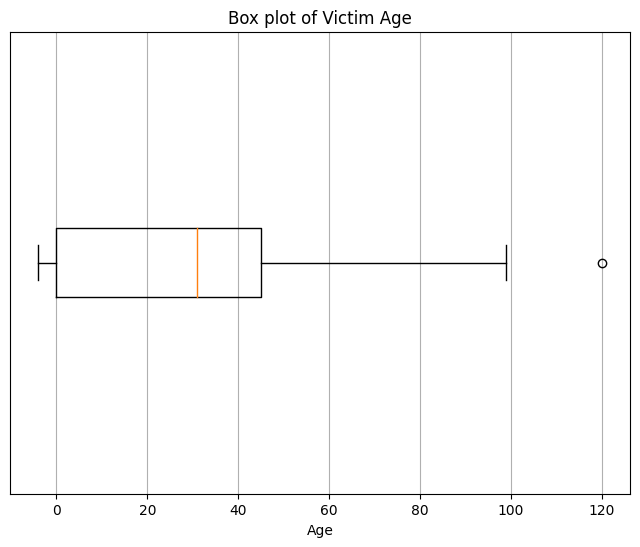

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(crime_data['Vict Age'], vert=False)
plt.title('Box plot of Victim Age')
plt.xlabel('Age')
plt.yticks([])
plt.grid(True)
plt.show()


By this boxplot and by the use of the '. describe() ' we see that there are negative and exaggerated ages like 120 years old, therefore, these are the values we should deal with.

Value counts for 'Vict Sex':
M    348156
F    309701
X     75890
H        98
-         1
Name: Vict Sex, dtype: int64


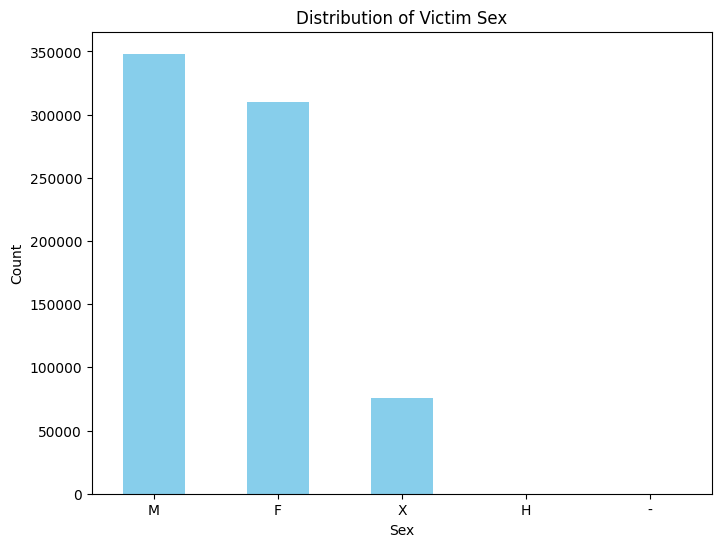

In [ ]:
sex_counts = crime_data['Vict Sex'].value_counts()

# Print the value counts
print("Value counts for 'Vict Sex':")
print(sex_counts)

# Plot the distribution of 'Vict Sex'
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Victim Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

We see that regarding the sex of the victim there are more than the 3 established, being 'H' and '-', this may be due to an error when filling out the information on the crimes.

In [ ]:
# Assuming 'crime_data' is your DataFrame and 'DATE OCC' is the column containing the date of occurrence

# Convert 'DATE OCC' column to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract year from the date and count occurrences by year
occurrences_by_year = crime_data['DATE OCC'].dt.year.value_counts().sort_index()

# Print occurrences by year
print("Occurrences by year:")
print(occurrences_by_year)

Occurrences by year:
2020    199601
2021    209571
2022    234732
2023    174571
2024     27201
Name: DATE OCC, dtype: int64


We see that per year there are no strange values, however, if we wanted we can ignore the reports filled out in the current year 2024 since they are few and the data set was updated two days ago at the time of its analysis.

### Justification for Methods
* IQR for Numerical Variables: This method is chosen because it is statistically robust and effective for identifying outliers in datasets that do not follow a normal distribution, which is common in real-world data. It is less sensitive to extreme values than the mean and standard deviation, making it suitable for datasets with skewed distributions
* Data exploration or data profiling technique:  It involves inspecting the distribution of categorical variables to identify any unusual or unexpected categories that might require further investigation. In some cases, low-frequency categories may represent rare events or subgroups within the dataset. Identifying these outliers can provide valuable insights into less common occurrences or demographic groups, which may be of particular interest in certain analyses or investigations.

## Missing values treatment
In Data Quality Management, handling missing values is a critical step that significantly impacts the accuracy and reliability of data-driven decision-making processes. Missing data can arise from various sources, including incomplete information, non-response, poor survey design, or data removal for confidentiality reasons. When not addressed appropriately, missing data can introduce bias into statistical analyses, leading to incorrect conclusions and potentially flawed business decisions.

There are several strategies for dealing with missing values, each with its own advantages and drawbacks. These include deleting the missing values, imputing them with statistical methods or other values, or using the missingness itself as a feature. The choice of strategy depends on the nature of the missing data (Missing Completely at Random, Missing at Random, or Missing Not at Random) and the specific requirements of the analysis.

Let's remember our missing data

In [ ]:
missing_count = crime_data.isnull().sum()
print(missing_count)

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           117626
Vict Age               0
Vict Sex          111830
Vict Descent      111837
Premis Cd             10
Premis Desc          507
Weapon Used Cd    552556
Weapon Desc       552556
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          783656
Crm Cd 3          843588
Crm Cd 4          845615
LOCATION               0
Cross Street      711547
LAT                    1
LON                    1
Age Group              0
Year-Month             0
dtype: int64


In [ ]:
missing_columns = missing_count[missing_count > 0]
print(missing_columns)

Mocodes           117626
Vict Sex          111830
Vict Descent      111837
Premis Cd             10
Premis Desc          507
Weapon Used Cd    552556
Weapon Desc       552556
Crm Cd 1              10
Crm Cd 2          783656
Crm Cd 3          843588
Crm Cd 4          845615
Cross Street      711547
LAT                    1
LON                    1
dtype: int64


There are variables that we believe are not substantial for the analysis we are carrying out such as lon, lat, location as they are so specific, the report code and any crime code that is not the first identified as it has so many missing values.
There are variables that we believe are not substantial for the analysis we are carrying out such as lon, lat, location as it is so specific, the report code and any crime code that is not the first identified as it has so many missing values, nor the date. reported to be so close to the occurrence of the crime, nor 'Rpt Dist No' to be so specific as well as location and Vict Descent to be so difficult to predict. We conclude that the variables to use are:

```markdown
| Variable          |
|-------------------|
| DATE OCC          |
| TIME OCC          |
| AREA              |
| AREA NAME         |
| Crm Cd            |
| Crm Cd Desc       |
| Vict Age          |
| Vict Sex          |
| Premis Cd         |
| Premis Desc       |
| Weapon Used Cd    |
| Weapon Desc       |
```

In [ ]:
variables = [
    'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
    'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex',
    'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc'
]

# Filter missing counts for variables in the list
missing_count_subset = missing_count[variables]

# Print missing counts
print("Missing counts for selected variables:")
print(missing_count_subset)

Missing counts for selected variables:
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex          111830
Premis Cd             10
Premis Desc          507
Weapon Used Cd    552556
Weapon Desc       552556
dtype: int64


In [ ]:
crime_data['Vict Sex'].fillna('X', inplace=True)

# Counting NaNs after replacement
nan_count = crime_data['Vict Sex'].isna().sum()

print(f"Number of NaNs after replacement: {nan_count}")

Number of NaNs after replacement: 0


In [ ]:
# Assuming crime_data is your DataFrame
crime_data['Vict Sex'].replace('M', 'X', inplace=True)

# Counting M's after replacement
m_count = (crime_data['Vict Sex'] == 'M').sum()

print(f"Number of 'M's after replacement: {m_count}")


Number of 'M's after replacement: 0


In [ ]:
# Assuming crime_data is your DataFrame
crime_data['Vict Sex'].replace('-', 'X', inplace=True)

# Counting '-' after replacement
dash_count = (crime_data['Vict Sex'] == '-').sum()

print(f"Number of '-'s after replacement: {dash_count}")

Number of '-'s after replacement: 0


In [ ]:
crime_data['Vict Sex'].fillna('X', inplace=True)

crime_data['Vict Sex'].replace('-', 'X', inplace=True)

missing_count = crime_data['Vict Sex'].isna().sum()

print(missing_count)

0


Due to the nature of the data we decided to fill in the missing values with an X as they were not identified as well as with 'M' and '-'.

In [ ]:
a = pd.DataFrame(crime_data["Premis Cd"])
Premis_Cd = a.mode()


print("Moda de Premis Cd:")
print(Premis_Cd)


crime_data["Premis Cd"].fillna("H", inplace=True)


print(f'new count for Premis Cd: {crime_data["Premis Cd"].isna().sum()}')

Moda de Premis Cd:
   Premis Cd
0      101.0
new count for Premis Cd: 0


In [ ]:
df = pd.DataFrame(crime_data["Premis Desc"])

# Calculating the mode of Premis Desc
Premis_Desc_mode = df.mode()

# Printing the mode of Premis Desc
print("Mode of Premis Desc:")
print(Premis_Desc_mode)

# Filling missing values in Premis Desc with the mode
crime_data["Premis Desc"].fillna(Premis_Desc_mode.iloc[0, 0], inplace=True)

# Printing the new count of NaNs in Premis Desc
print(f'New NaN count for Premis Desc: {crime_data["Premis Desc"].isna().sum()}')


Mode of Premis Desc:
  Premis Desc
0      STREET
New NaN count for Premis Desc: 0


In [ ]:
a = pd.DataFrame(crime_data["Weapon Used Cd"])

# Calculating the mode of Weapon Used Cd
Weapon_Used_mode = df.mode()

# Printing the mode of Weapon Used Cd
print("Mode of Weapon Used Cd:")
print(Weapon_Used_mode)

# Filling missing values in Weapon Used Cd with the mode (assuming it's numerical)
crime_data["Weapon Used Cd"].fillna(400.0, inplace=True)

# Printing the new count of NaNs in Weapon Used Cd
print(f'New NaN count for Weapon Used Cd: {crime_data["Weapon Used Cd"].isna().sum()}')


Mode of Weapon Used Cd:
  Premis Desc
0      STREET
New NaN count for Weapon Used Cd: 0


In [ ]:
# Calculating the mode of Weapon Desc
weapon_desc_mode = crime_data['Weapon Desc'].mode()

# Printing the mode of Weapon Desc
print("Mode of Weapon Desc:")
print(weapon_desc_mode)

# Filling missing values in Weapon Desc with the mode
crime_data['Weapon Desc'].fillna(weapon_desc_mode.iloc[0], inplace=True)

# Printing the new count of NaNs in Weapon Desc
print(f'New NaN count for Weapon Desc: {crime_data["Weapon Desc"].isna().sum()}')

Mode of Weapon Desc:
0    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
Name: Weapon Desc, dtype: object
New NaN count for Weapon Desc: 0


In [ ]:
# Calculating the mode of AREA
area_mode = crime_data['AREA'].mode()

# Printing the mode of AREA
print("Mode of AREA:")
print(area_mode)

# Filling missing values in AREA with the mode
crime_data['AREA'].fillna(area_mode.iloc[0], inplace=True)

# Printing the new count of NaNs in AREA
print(f'New NaN count for AREA: {crime_data["AREA"].isna().sum()}')

# Calculating the mode of AREA NAME
area_name_mode = crime_data['AREA NAME'].mode()

# Printing the mode of AREA NAME
print("Mode of AREA NAME:")
print(area_name_mode)

# Filling missing values in AREA NAME with the mode
crime_data['AREA NAME'].fillna(area_name_mode.iloc[0], inplace=True)

# Printing the new count of NaNs in AREA NAME
print(f'New NaN count for AREA NAME: {crime_data["AREA NAME"].isna().sum()}')

# Calculating the mode of Crm Cd
crm_cd_mode = crime_data['Crm Cd'].mode()

# Printing the mode of Crm Cd
print("Mode of Crm Cd:")
print(crm_cd_mode)

# Filling missing values in Crm Cd with the mode
crime_data['Crm Cd'].fillna(crm_cd_mode.iloc[0], inplace=True)

# Printing the new count of NaNs in Crm Cd
print(f'New NaN count for Crm Cd: {crime_data["Crm Cd"].isna().sum()}')

# Calculating the mode of Crm Cd Desc
crm_cd_desc_mode = crime_data['Crm Cd Desc'].mode()

# Printing the mode of Crm Cd Desc
print("Mode of Crm Cd Desc:")
print(crm_cd_desc_mode)

# Filling missing values in Crm Cd Desc with the mode
crime_data['Crm Cd Desc'].fillna(crm_cd_desc_mode.iloc[0], inplace=True)

# Printing the new count of NaNs in Crm Cd Desc
print(f'New NaN count for Crm Cd Desc: {crime_data["Crm Cd Desc"].isna().sum()}')

Mode of AREA:
0    1
Name: AREA, dtype: int64
New NaN count for AREA: 0
Mode of AREA NAME:
0    Central
Name: AREA NAME, dtype: object
New NaN count for AREA NAME: 0
Mode of Crm Cd:
0    510
Name: Crm Cd, dtype: int64
New NaN count for Crm Cd: 0
Mode of Crm Cd Desc:
0    VEHICLE - STOLEN
Name: Crm Cd Desc, dtype: object
New NaN count for Crm Cd Desc: 0


The choice to use the mode for handling missing values in columns such as AREA, AREA NAME, Crm Cd, and Crm Cd Desc is justified by the nature of these categorical variables. In categorical data, the mode represents the most frequently occurring value, making it a suitable choice for filling missing values as it preserves the distribution of the existing data and reflects the typical category within the dataset. This approach ensures that the imputed values align with the overall characteristics of the dataset. However, for columns like age and sex of the victim, which are typically continuous or binary variables, respectively, the mode may not be an appropriate choice due to its inability to capture the variability or nuanced characteristics of the data. In such cases, alternative methods like mean or median for age and a specific default value (e.g., 'X' for sex) are more appropriate for maintaining the integrity and interpretability of the data.

### Treatment of numerical and categorical values
In Data Quality Management, the treatment of numerical and categorical values is crucial for ensuring the reliability and accuracy of data analysis and decision-making processes. For numerical values, techniques such as mean, median, or mode imputation are commonly used to fill in missing data, with each method having its own set of advantages and limitations. For instance, mean imputation is straightforward but can be sensitive to outliers, while mode imputation preserves the original distribution of the data but may not always represent the central tendency accurately.

Categorical values often require different approaches, such as one-hot encoding or label encoding, to transform them into a numerical format suitable for machine learning models. This process involves converting categories into a numerical representation, which is defined on the training set and equally applied to the test set. This transformation is essential for ensuring that the model can effectively learn from the categorical data without introducing bias or losing information.

The choice of treatment method for both numerical and categorical values depends on the specific characteristics of the data and the requirements of the analysis or model. It's important to consider the implications of each method on the data quality and the potential impact on the results of any subsequent analyses or predictions.


In [ ]:
print(crime_data.duplicated().sum())

0


Now we formart sex variables for easier use

In [ ]:
crime_data['Vict Sex'] = crime_data['Vict Sex'].replace({'F': 1, 'M': 2, 'X': 3})

As the other variables that have the 'Cd' have their own code and format, we can say that they are already encoded

### Grouping Data by date
In the realm of Data Quality Management, the process of grouping data by months and years is a pivotal step that enables the analysis of temporal trends and patterns within the dataset. This approach is particularly useful for datasets that span multiple years, allowing for a detailed examination of how data points vary across different periods. By grouping data in this manner, analysts can identify seasonal patterns, cyclical trends, and other time-dependent phenomena that are crucial for making informed decisions and predictions.

The objective of this Data Quality Check is to ensure that the data is accurately and consistently grouped by months and years, thereby facilitating a comprehensive analysis of the dataset's temporal dynamics. This process involves converting date columns into a format that can be easily manipulated for grouping, such as extracting the month and year components from the date. Utilizing Python's pandas library, for instance, allows for efficient and straightforward implementation of this grouping, as demonstrated by the use of the `groupby` function with the `pd.Grouper` method to specify the frequency of grouping.

By adhering to this methodology, analysts can ensure that the data quality check is not only thorough but also tailored to the specific needs of the analysis, providing valuable insights into the dataset's temporal characteristics. This step is essential for maintaining the integrity of the data and ensuring that subsequent analyses are based on accurate and meaningful temporal groupings.


In [ ]:
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])


crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month'] = crime_data['DATE OCC'].dt.month


crime_data_grouped = crime_data.groupby(['Year', 'Month', "AREA"]).size().reset_index(name='Count')


print(crime_data_grouped)

      Year  Month  AREA  Count
0     2020      1     1   1211
1     2020      1     2    825
2     2020      1     3   1059
3     2020      1     4    722
4     2020      1     5    720
...    ...    ...   ...    ...
1045  2024      2    17    365
1046  2024      2    18    456
1047  2024      2    19    325
1048  2024      2    20    429
1049  2024      2    21    361

[1050 rows x 4 columns]


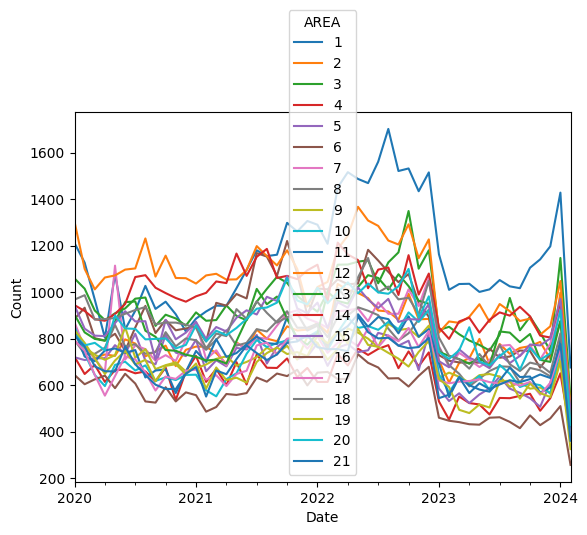

In [ ]:
crime_data_grouped['Date'] = pd.to_datetime(crime_data_grouped['Year'].astype(str) + '-' + crime_data_grouped['Month'].astype(str))
crime_data_grouped.set_index('Date', inplace=True)

pivot_data = crime_data_grouped.pivot(columns='AREA', values='Count')

pivot_data.plot(kind='line', legend=True)
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

### Variables that will enter the model

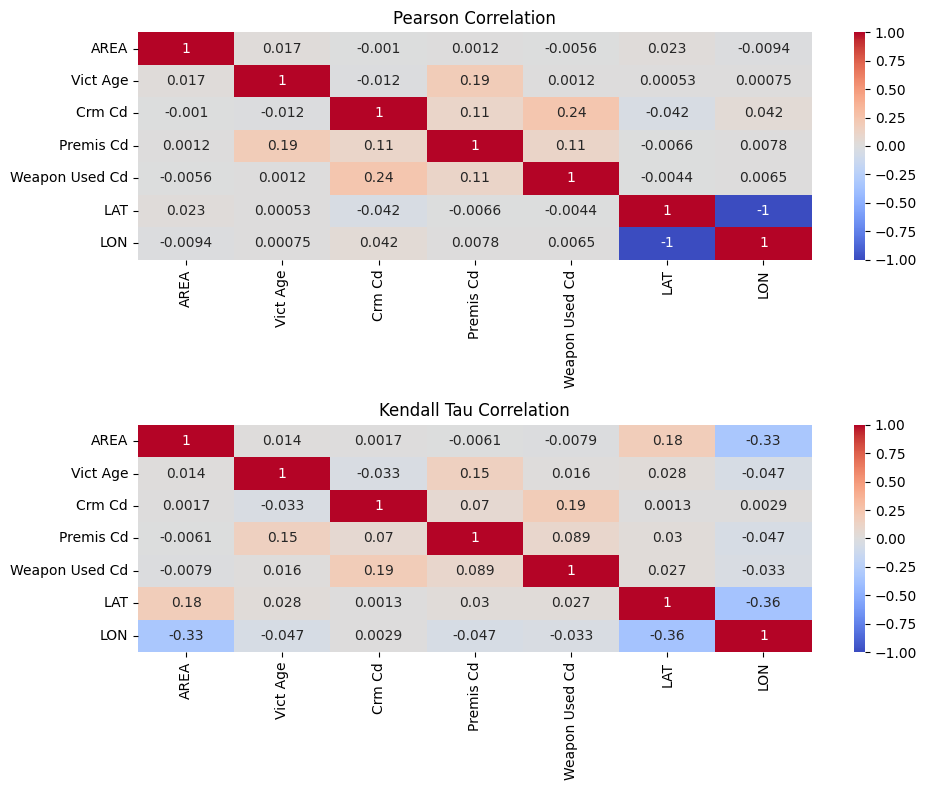

In [ ]:
# Selecting the variables of interest
variables = ['AREA', 'Vict Age', 'Crm Cd', 'Premis Cd', 'Weapon Used Cd', 'LAT', 'LON']

# Encoding non-numeric values to numeric equivalents
crime_data_encoded = crime_data[variables].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Drop rows with NaN values (if needed)
crime_data_encoded.dropna(inplace=True)

# Calculating Pearson correlation
corr_pearson = crime_data_encoded.corr(method='pearson')

# Calculating Kendall Tau correlation
corr_kendall = crime_data_encoded.corr(method='kendall')

# Visualizing correlation matrices
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

plt.subplot(2, 1, 2)
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kendall Tau Correlation')

plt.tight_layout()
plt.show()

With the results of the Pearson and Kendall Tau correlations, we can look at the relationships between variables in your data set. This can help us decide which variables might be important for a linear regression model. Let's analyze the results:

**Pearson's correlation:**
- Crm Cd (Crime Code):
  - It has a moderate correlation with Weapon Used Cd (0.37), suggesting that there may be a relationship between type of crime and weapon used.
  - It also has a weak correlation with Premis Cd (0.11), indicating a weak relationship between the type of crime and the type of place where it occurred.
  - The correlations with LAT and LON are very close to zero, suggesting that geographic location (in terms of latitude and longitude) does not have a strong linear relationship with crime type.

**Kendall Tau correlation:**
- Crm Cd (Crime Code):
  - Similar to the Pearson correlation, it has a moderate correlation with Weapon Used Cd (0.26).
  - The correlation with Premis Cd is similar to that of Pearson, also weak (0.07).
  - Vict Age has a weak negative correlation (-0.03), suggesting that as the victim's age increases, the type of crime may be slightly different.
  - As in Pearson, the correlations with LAT and LON are close to zero.

**Variables for a linear regression model:**
- **Dependent Variable (Y):**
  - In this case, it could be Crm Cd (Crime Code), since it is the variable we want to predict or explain.
- **Independent Variables (X):**
  - Weapon Used Cd: It has a moderate correlation in both Pearson and Kendall Tau. It could be a good independent variable, as it seems to be related to crime type.
  - Premis Cd (Place Type Code): Although it has a weak correlation, it could still be relevant to include in the model, as there is a relationship even if slight.
  - Vict Age (Victim Age): Although weak in Kendall Tau, it could be interesting to explore its effect on crime type.
  - LAT and LON (Latitude and Longitude): Both variables have correlations very close to zero, so they do not seem to be useful for predicting crime type in a linear regression model.

**Variable Selection Method:**
- Pearson's correlation and Kendall Tau correlation were used to assess the linear and rank relationship between variables.
- Variables that showed a significant correlation (even if moderate or weak) with the Crm Cd (Crime Code) variable were chosen.
- Not all variables entered the model because some, such as LAT and LON, did not show a significant relationship with Crm Cd.

So, for a linear regression model, one could use Crm Cd as the dependent variable and Weapon Used Cd, Premis Cd, and Vict Age as independent variables. This is based on the observed correlations and the fact that these variables have some relationship, however weak, to the type of crime you are trying to predict.

## References
*	A complete guide on how to build effective data quality checks. (2023a, December 18). ProjectPro. https://www.projectpro.io/article/data-quality-checks/949


*	A complete guide on how to build effective data quality checks. (2023b, December 18). ProjectPro. https://www.projectpro.io/article/data-quality-checks/949


*	Chaudhary, S. (2024, January 24). Why 1.5 is used in the IQR rule for outlier detection. Built In. https://builtin.com/articles/1-5-iqr-rule

*	Crime Data from 2020 to Present - Catalog. (2024, March 8). https://catalog.data.gov/dataset/crime-data-from-2020-to-present

*	FasterCapital [FasterCapital]. (2023, December 17). Analisis estadístico análisis de patrones de datos con frecuencia absoluta - FasterCapital. FasterCapital. https://fastercapital.com/es/contenido/Analisis-estadistico--analisis-de-patrones-de-datos-con-frecuencia-absoluta.html


*	Firdose, T. (2023, June 8). Treating Outliers using IQR and Percentile approach — Part 2. Medium. https://tahera-firdose.medium.com/treating-outliers-using-iqr-and-percentile-approach-part-2-9d8c4ec55af7


*	GfG. (2021, December 2). How to use Pandas filter with IQR? GeeksforGeeks. https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/


*	Jäger, S., Allhorn, A., & Bießmann, F. (2021). A benchmark for data imputation methods. Frontiers in Big Data, 4. https://doi.org/10.3389/fdata.2021.693674

*	Keita, Z. (2023, January 31). Top techniques to handle missing values Every data scientist should know. https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

*	Kleppen, E. (2023, May 11). How to find outliers using Python [Step-by-Step guide]. CareerFoundry. https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

*	Ngo, H. (2022, August 9). How to clean your data in Python - towards data science. Medium. https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d

*	Team, D. (2023, October 10). Top 5 outlier detection methods Every data enthusiast must know. DataHeroes. https://dataheroes.ai/blog/outlier-detection-methods-every-data-enthusiast-must-know/

*	Urbano, F., Basille, M., & Cagnacci, F. (2014). Data Quality: Detection and management of outliers. In Springer eBooks (pp. 115–137). https://doi.org/10.1007/978-3-319-03743-1_8
